# Clustering (Unsupervised Learning)


## Worked Example
Let us take an example. As before, we will want to get some of our required libraries imported before getting to work:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Import style class from matplotlib and use that to apply

from matplotlib import style
plt.style.use('ggplot')

Now, we will take a bunch of data points and cluster them. How, you ask? Using a fantastic algorithm called k-means. In addition to being fantastic, k-means is a simple algorithm. Here is how it works.

1. First, we guess or determine the number of clusters (k) we want. If our data points are in n dimensions, the centers of these clusters, or centroids, will also be n-dimensional points. In other words, we will have a total of k n-dimensional points that we will call the centroids. Yes, these are essentially just some random points in that n-dimensional space.
2. Now, we assign each of the actual data points to one of these k centroids based on their distances to these centroids. After this step, each data point will be assigned to one of the k clusters.
3. Now, we recompute each cluster’s centroid. So, we end up with k centroids again, but these are now adjusted to reflect how the data points are distributed.

We keep repeating steps 2 and 3 until we converge. In other words, we cease this iterative process when the centroids of the k clusters are no longer changing. And at that point we have “real” k clusters,with each data point belonging to one of them.
Fortunately, with the right package in Python, we do not need to implement all of this from scratch. 

That right package is sklearn.cluster, which contains implementations for various clustering algorithms, including k-means. Let us import it:

In [3]:
# Get KMeans class from clustering library available within
#scikit-learn
from sklearn.cluster import KMeans

For this exercise, we are just going to make up some data points in two-dimensional (2D) space (so we can visualize them easily):

In [4]:
# Define data points on 2D plane using Cartesian coordinates
X = np.array([[1, 2],
[5, 8],
[1.5, 1.8],
[8, 8],
[1, 0.6],
[9, 11]])

Now, we will proceed with clustering as well as visualizing the clusters that k-means algorithm generates:

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]
Coordinate: [1. 2.] Label: 1
Coordinate: [5. 8.] Label: 0
Coordinate: [1.5 1.8] Label: 1
Coordinate: [8. 8.] Label: 0
Coordinate: [1.  0.6] Label: 1
Coordinate: [ 9. 11.] Label: 0


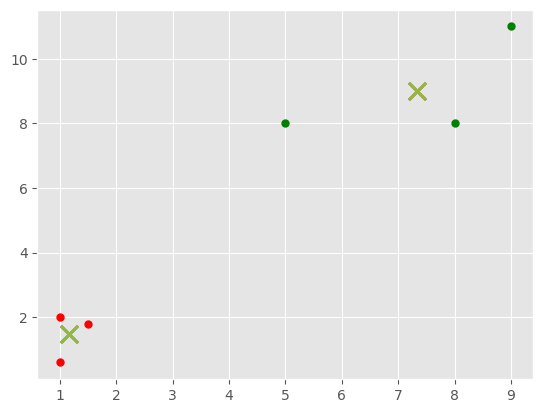

In [5]:
# Perform clustering using k-means algorithm
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
# ‘kmeans’ holds the model; extract information about clusters
# as represented by their centroids, along with their labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
# Define a colors array
colors = ['g.', 'r.', 'c.', 'y.']
# Loop to go through each data point, plotting it on the plane
# with a color picked from the above list – one color per cluster
for i in range(len(X)):
  print('Coordinate:',X[i], 'Label:', labels[i])
  plt.plot(X[i][0], X[i][1], colors[labels[i]],
  markersize = 10)
  # Plot the centroids using “x”
  plt.scatter(centroids[:, 0],centroids[:, 1],
  marker='x', s=150, linewidths=2, zorder=10)
plt.show()

The plot displays the output. As you can see, there are six points plotted. It is easy to imagine that if we were to look for two clusters, we can have one group at the bottom-left (represented in red) and another group in top-right (represented in green). Here we have used the k-means algorithm, which aims to find k unique clusters where the center of each cluster (centroid) is the mean of the values in that cluster. These clusters are represented using blue “X” symbols.

Now let us see what happens if we want three clusters. Change the n_clusters argument (input or parameter) in KMeans function to be 3. And voilà! the plot shows how this algorithm can give us three clusters with the same six data points.

You can even try n_clusters=4. So, you see, this is unsupervised learning because the labels or colors of the data points are not known to be able to put them in classes. In fact, we do not even know how many labels or classes there should be, and so we could impose almost as many of those as we like.

## Question 1
For this exercise, you need to work with the breast cancer Coimbra dataset.
1. First download the dataset from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra and load the data. The dataset has 10 features including the class labels (1 or 2). Next, you need to round off the Leptin feature values to two decimal places.

2. Having done that, use the first nine attributes (dataset minus the class label) to group the data points into two clusters. You can use any clustering algorithm of your choice, but the number of clusters should remain the same. 
3. Once the clustering is complete, use the class labels to evaluate the accuracy of the clustering algorithm that you chose.

In [6]:
import pandas as pd

df = pd.read_csv('Coimbra.csv')
df['Leptin'] = round(df['Leptin'],2)
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.81,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.84,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.94,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.88,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.70,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.68,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.45,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.48,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.96,33.750000,3.27000,392.460,2


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[ 56.37142857  27.23719681  92.00952381   8.58681905]
 [ 66.18181818  30.87447187 153.          23.61690909]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 1]
Coordinate: [48.    23.5   70.     2.707] Label: 0
Coordinate: [83.         20.69049454 92.          3.115     ] Label: 0
Coordinate: [82.         23.12467037 91.          4.498     ] Label: 0
Coordinate: [68.         21.36752137 77.          3.226     ] Label: 0
Coordinate: [86.         21.11111111 92.          3.549     ] Label: 0
Coordinate: [49.         22.85445769 92.          3.226     ] Label: 0
Coordinate: [89.   22.7  77.    4.69] Label: 0
Coordinate: [ 76.    23.8  118.     6.47] Label: 0
Coordinate: [73.   22.   97.    3.35] Label: 0
Coordinate: [75.    23.    83.     4.952] Label: 0
Coordinate: [34.    21.47  78.     3.469] Label: 0

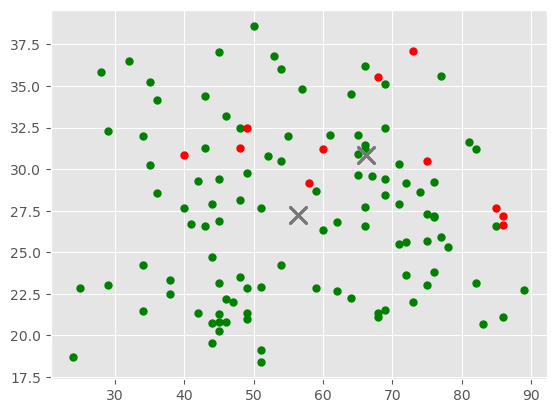

In [12]:
from sklearn.cluster import KMeans

df = df.iloc[:,:-1]
X = df.to_numpy()

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

for i in range(len(X)):
  print('Coordinate:',X[i], 'Label:', labels[i])
  plt.plot(X[i][0], X[i][1], colors[labels[i]],
  markersize = 10)
  # Plot the centroids using “x”
  plt.scatter(centroids[:, 0],centroids[:, 1],
  marker='x', s=150, linewidths=2, zorder=10)
plt.show()